In [67]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import rosbag

# from geometry_msgs.msg import Point, Quaternion, Vector3
# from snapstack_msgs.msg import State, Goal, AttitudeCommand, ControlLog, QuadFlightMode

plt.rcParams.update({'font.size': 24})

In [68]:
# filename_sim = 'sim/coml_circle_wind_0.bag'
# filename_real = 'real/real_coml_no_wind.bag'

filename_sim = 'sim/pid_circle_wind_0.bag'
filename_real = 'real/real_pid_no_wind.bag'

b_sim = bagreader(f'../rosbags/{filename_sim}')
b_real = bagreader(f'../rosbags/{filename_real}')

# replace the topic name as per your need
topic_log_sim = b_sim.message_by_topic('/HX14s/log')
topic_log_real = b_real.message_by_topic('/HX14/log')

# topic_log_coml = b_coml.message_by_topic('/HX14/log')
# topic_log_pid = b_pid.message_by_topic('/HX14/log')

df_log_sim = pd.read_csv(topic_log_sim)
df_log_real = pd.read_csv(topic_log_real)

[INFO]  Data folder ../rosbags/sim/pid_circle_wind_0 already exists. Not creating.
[INFO]  Data folder ../rosbags/real/real_pid_no_wind already exists. Not creating.


In [69]:
coml_start_i = df_log_sim[df_log_sim['p_ref.x'] < 2].index[0] - 1
try:
    coml_end_i = df_log_sim[df_log_sim['p_ref.z'] > df_log_sim['p_ref.z'][0]].index[0] - 1
except:
    coml_end_i = len(df_log_sim['p_ref.z'])

pid_start_i = df_log_real[df_log_real['p_ref.x'] < 2].index[0] - 1
try:
    pid_end_i = df_log_real[df_log_real['p_ref.z'] > df_log_real['p_ref.z'][0]].index[0] - 1
except:
    pid_end_i = len(df_log_real['p_ref.z'])

df_log_sim_truncate = df_log_sim.truncate(before=coml_start_i, after=coml_end_i)
df_log_real_truncate = df_log_real.truncate(before=pid_start_i, after=pid_end_i)


In [70]:
def avg_tracking_error(df_log):
    err_x = df_log['p_err.x'].to_numpy()
    err_y = df_log['p_err.y'].to_numpy()
    err_z = df_log['p_err.z'].to_numpy()
    total_err = np.vstack((err_x, err_y, err_z)).T # T x 3
    avg_tracking_error = np.mean(np.linalg.norm(total_err, axis=1))

    return avg_tracking_error

sim_tracking_error = avg_tracking_error(df_log_sim_truncate)
print('sim tracking error = ', sim_tracking_error)
real_tracking_error = avg_tracking_error(df_log_real_truncate)
print('real tracking error = ', real_tracking_error)


sim tracking error =  0.06927121159118287
real tracking error =  0.2854320366365777


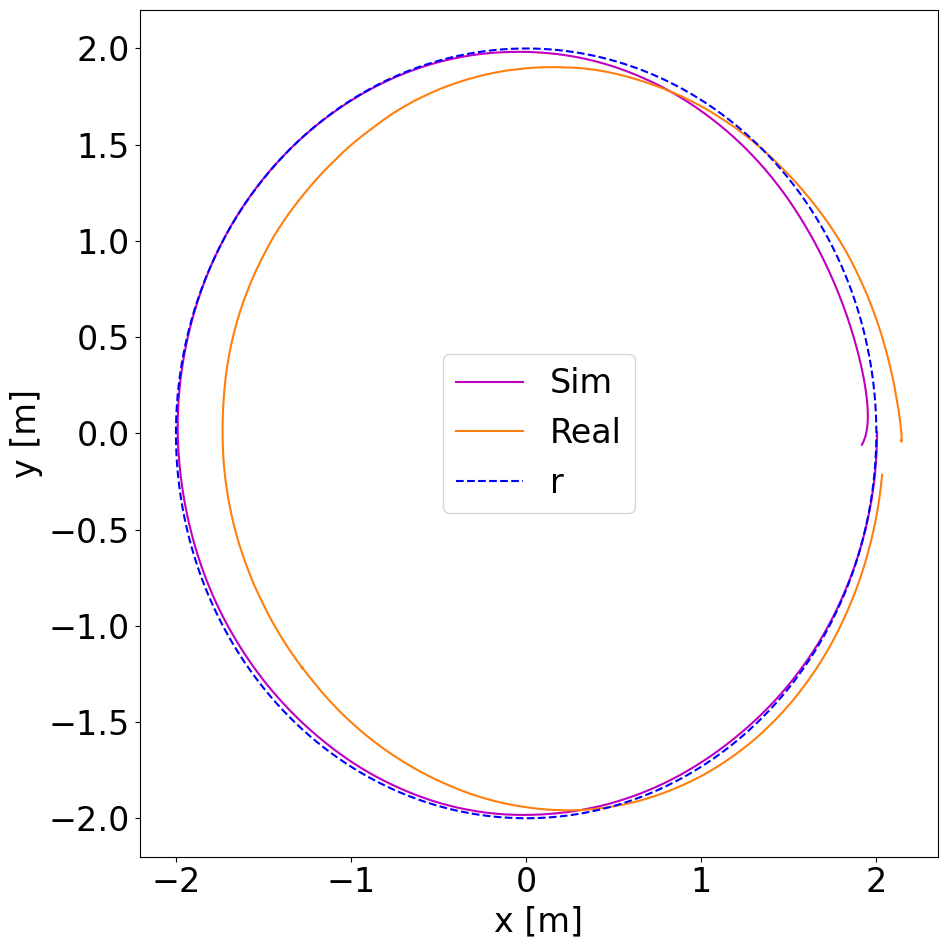

In [71]:
def plot(df_log_sim, df_log_real, square=False):
    # Parametric
    if square:
        plt.figure(figsize=(10, 10))
    else:
        plt.figure(figsize=(30, 10))

    plt.plot(df_log_sim['p.x'], df_log_sim['p.y'], 'm-', label='Sim')
    plt.plot(df_log_real['p.x'], df_log_real['p.y'], '-', color='tab:orange', label='Real')
    plt.plot(df_log_real['p_ref.x'], df_log_real['p_ref.y'], 'b--', label='r')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    
    plt.legend()
    # plt.title('Parametric Position')
    plt.tight_layout()
    plt.show()

plot(df_log_sim_truncate, df_log_real_truncate, True)
# plot(df_log_sim, df_log_real, False)

